In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# borrowed from fastq_to_fasta.py
fastq=open("example.fastq","r").read()
fasta=list()
total=len(open("example.fastq","r").readlines())
for i in range(total):
	if i%4==0 or i%4==1: fasta.append(fastq.split("\n")[i])
out=open("output.fasta","w")
for i in range(0,len(fasta),2): out.write("".join(map(str,fasta[i])).replace("@",">")+"\n"+"".join(map(str,fasta[i+1]))+"\n")

In [4]:
# Sequences and Phred scores...
seq_list=(open("output.fasta","r").read()).split("\n")
dna_list=list()
for _ in range(1,len(seq_list),2): dna_list.append(seq_list[_])
phred_list=(open("example.fastq","r").read()).split("\n")
qualities=list()
for i in range(0,len(phred_list)):
    if i%4==3: qualities.append(phred_list[i])

In [5]:
# ASCII quality scores to numbers
score_list=list()
for i in range(len(qualities)):
    phred=qualities[i]
    scores=[]
    for x in range(len(phred)): scores.append(ord(phred[x])-33)
    score_list.append(scores)

In [6]:
# Sequence and Quality scores in one dictionary
data_dict={}
for base_index in range(288): # <--- "example.fastq" contains sequences that have at least 288 bases.
    scores=list()
    for sequence_index in range(len(score_list)):
        scores.append((score_list[sequence_index])[base_index])
    data_dict.update({base_index:scores})

No handles with labels found to put in legend.


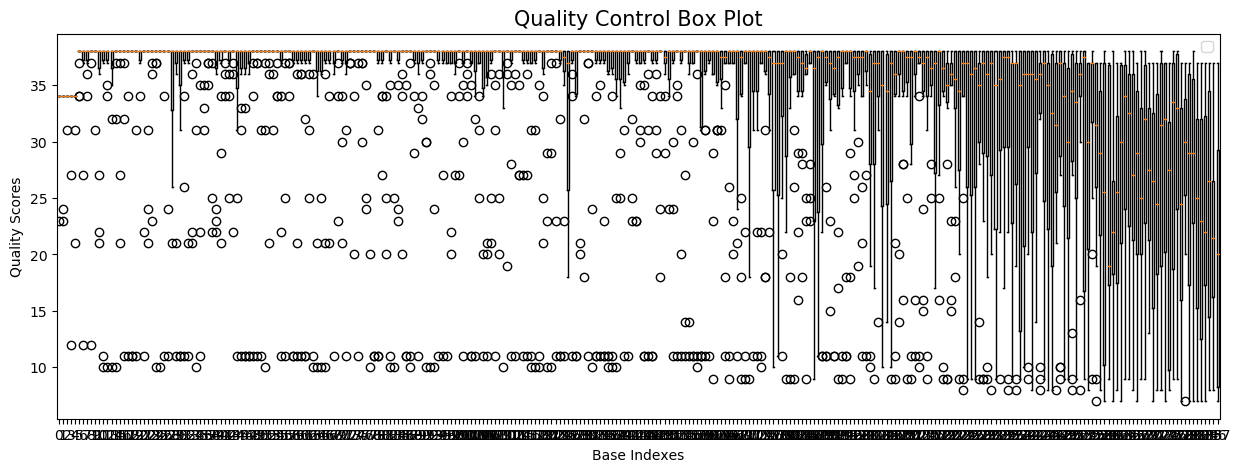

In [8]:
fig,ax=plt.subplots(figsize=(15,5),sharey=True,sharex=True)

# Plots
#for index in range(len(score_list)): ax.plot(range(len(score_list[index])),score_list[index], label=f"seq{index+1}")

# Boxplots
ax.boxplot(data_dict.values(),labels=data_dict.keys())

ax.set_title('Quality Control Box Plot', fontsize=15)
ax.set_xlabel("Base Indexes")
ax.set_ylabel("Quality Scores")
ax.legend(fontsize=10)
plt.show()